In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import plot_partregress_grid

In [2]:
pd.set_option('display.float_format', str)

# Baseline Model

In [3]:
df = pd.read_csv('data/kc_house_data_cleaned.csv')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,2,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400,1951,1991.0,98125,47.721000000000004,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,2,6,770,0,1933,0.0,98028,47.7379,-122.23299999999999,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,4,7,1050,910,1965,0.0,98136,47.5208,-122.39299999999999,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,2,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
col_selector = ['price','sqft_living','grade','view','bedrooms','bathrooms']
df_base = df[col_selector]

In [6]:
y = df_base.price
X = df_base.drop(columns = ['price'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
ss = StandardScaler()
X_trans_train = ss.fit_transform(X_train)
X_trans_test = ss.transform(X_test)

In [9]:
model = sm.OLS(y_train, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4195.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:02   Log-Likelihood:            -2.0851e+05
No. Observations:               15117   AIC:                         4.170e+05
Df Residuals:                   15111   BIC:                         4.171e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1924.854    280.744      0.0

In [10]:
lr_base = LinearRegression()
lr_base.fit(X_trans_train, y_train)
print(lr_base.coef_, lr_base.intercept_)

[186144.0681946  108103.49277869  71009.81179567 -31810.61474657
 -17251.04300471] 540390.9640801747


In [11]:
X_train.columns

Index(['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms'], dtype='object')

In [20]:
# double check the r

r = lr_base.score(X_trans_train, y_train)
print('R squared is ', r)

R squared is  0.5812646517311026


In [13]:
y_base_predict = lr_base.predict(X_trans_test)

In [18]:
MAE = mean_absolute_error(y_base_predict, y_test)
RMSE = np.sqrt(mean_squared_error(y_base_predict, y_test))

print('MAE is ', MAE)
print('RMSE is ', RMSE)

MAE is  157506.37441627932
RMSE is  243370.57616274315


# POSSIBLE FEATURES

***Location and neighborhood***
 zipcode
 View
 waterfront

***Living***
floors
Bathroom/bedroom ratio
Bathroom/floor ratio
Bathroom by year built range?

***Investment***
House value increasing rate
Condition + grade
Yard
FAR
Old house + renovated
Old house

***Extra***
Flood zone and disaster
Crime and safety

# COMPLEX MODEL 1

In [21]:
df_comp = pd.read_csv('data_han/df_for_model_1.csv')

In [22]:
df_comp.shape

(21597, 22)

In [27]:
col_selector = ['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms',
       'bathrooms', 'floors', 'grade', 'condition', 'view', 'waterfront',
       'sqft_basement', 'BR/BTH', 'FAR', 'yard', 'Living_Space_VS_Bedroom',
       'yr_built', 'yr_renovated', 'yr_built_pd', 'renovated',
       'yr_renovated_pd', 'built_and_renovated']
X = df_comp[col_selector]
y = df_comp.price

X = X.apply(lambda x: (x-x.mean())/ x.std())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
ss = StandardScaler()
X_trans_train = ss.fit_transform(X_train)
X_trans_test = ss.transform(X_test)

In [29]:
model = sm.OLS(y_train, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1479.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:32:13   Log-Likelihood:            -2.0665e+05
No. Observations:               15117   AIC:                         4.133e+05
Df Residuals:                   15095   BIC:                         4.135e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.392e+05   1703.078    316.627      0.0

In [30]:
pd.DataFrame(np.arange(0,22,1),df_comp.columns)

,0
price,0
sqft_living,1
sqft_lot,2
sqft_above,3
bedrooms,4
bathrooms,5
floors,6
grade,7
condition,8
view,9


***conclusion***
* not significant
 * lot size
 * floors, try **floor+lot OR living**
 * basement
 * yard **try living/lot**
 * yr_renovated
 * yr_renovated_pd
 

* working engineered features
 * BR/BTH
 * FAR
 * built_and_renovated
 
* Others
 * bin yr... less
 
* has a data leakge issue

# COMPLEX MODEL 2

In [35]:
df_comp2 = pd.read_csv('data_han/df_for_model_2.csv')

In [36]:
df_comp2.shape

(21597, 24)

In [37]:
df_comp2.head()

,price,sqft_living,bedrooms,bathrooms,condition,floors,sqft_lot,sqft_above,sqft_basement,BR/BTH,...,living_per_lot,grade,yr_built,yr_renovated,yr_built_pd,renovated,built_and_renovated,zipcode,view,waterfront
0,221900.0,1180,3,1.0,2,1.0,5650,1180,0,3.0,...,0.21,7,1955,0.0,6,0,60,98178,0,0
1,538000.0,2570,3,2.25,2,2.0,7242,2170,400,1.33,...,0.3,7,1951,1991.0,6,1,18,98125,0,0
2,180000.0,770,2,1.0,2,1.0,10000,770,0,2.0,...,0.08,6,1933,0.0,4,0,40,98028,0,0
3,604000.0,1960,4,3.0,4,1.0,5000,1050,910,1.33,...,0.21,7,1965,0.0,7,0,70,98136,0,0
4,510000.0,1680,3,2.0,2,1.0,8080,1680,0,1.5,...,0.21,8,1987,0.0,9,0,90,98074,0,0


In [38]:
X2 = df_comp2.drop(columns = ['price'])
y2 = df_comp2.price

X2 = pd.get_dummies(X2,columns=['zipcode'],drop_first=True)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3)

In [39]:
ss = StandardScaler()
X2_trans_train = ss.fit_transform(X2_train)
X2_trans_test = ss.transform(X2_test)

In [40]:
model = sm.OLS(y2_train, sm.add_constant(X2_trans_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     721.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:38:00   Log-Likelihood:            -2.0278e+05
No. Observations:               15117   AIC:                         4.057e+05
Df Residuals:                   15025   BIC:                         4.064e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.41e+05   1321.250    409.426      0.0

### sklearn
double check the result<br>
and for plotting

In [63]:
lr_comp_2 = LinearRegression()
lr_comp_2.fit(X2_trans_train, y2_train)

LinearRegression()

In [64]:
r2 = lr_comp_2.score(X2_trans_train, y2_train)
print('r square is: ', r2)

r square is:  0.8138269084407673


In [67]:
y_comp_2_predict = lr_comp_2.predict(X2_trans_test)

MAE = mean_absolute_error(y_comp_2_predict, y2_test)
RMSE = np.sqrt(mean_squared_error(y_comp_2_predict, y2_test))

print('MAE is ', MAE)
print('RMSE is ', RMSE)

MAE is  95868.96907933182
RMSE is  148254.79847617535


In [68]:
X2

,sqft_living,bedrooms,bathrooms,condition,floors,sqft_lot,sqft_above,sqft_basement,BR/BTH,FAR,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,3,1.0,2,1.0,5650,1180,0,3.0,0.21,...,0,0,0,0,0,0,1,0,0,0
1,2570,3,2.25,2,2.0,7242,2170,400,1.33,0.35,...,0,0,0,0,0,0,0,0,0,0
2,770,2,1.0,2,1.0,10000,770,0,2.0,0.08,...,0,0,0,0,0,0,0,0,0,0
3,1960,4,3.0,4,1.0,5000,1050,910,1.33,0.39,...,0,0,0,0,0,0,0,0,0,0
4,1680,3,2.0,2,1.0,8080,1680,0,1.5,0.21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,2.5,2,3.0,1131,1530,0,1.2,1.35,...,0,0,0,0,0,0,0,0,0,0
21593,2310,4,2.5,2,2.0,5813,2310,0,1.6,0.4,...,1,0,0,0,0,0,0,0,0,0
21594,1020,2,0.75,2,2.0,1350,1020,0,2.67,0.76,...,0,0,0,0,0,0,0,0,0,0
21595,1600,3,2.5,2,2.0,2388,1600,0,1.2,0.67,...,0,0,0,0,0,0,0,0,0,0


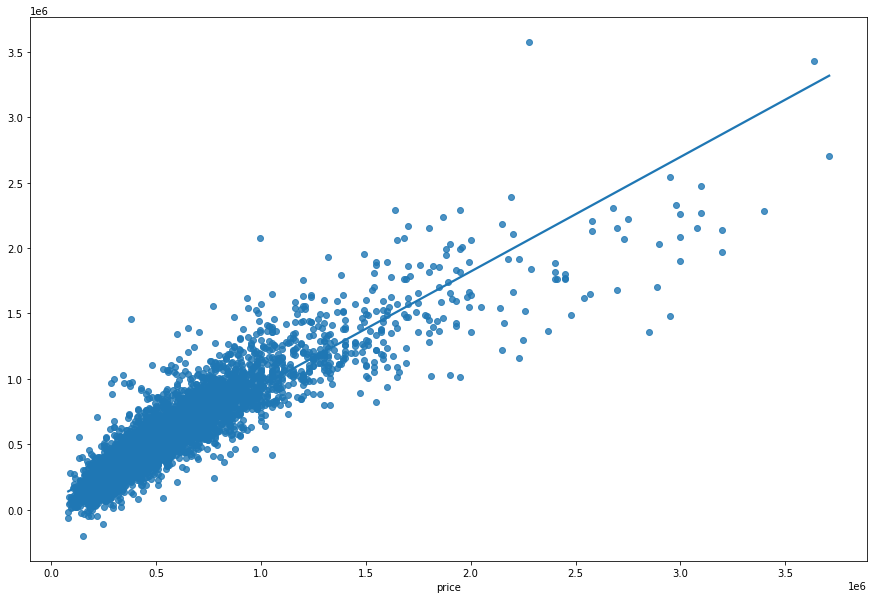

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=y2_test,y=y_comp_2_predict,ci=None,scatter=True);

<AxesSubplot:xlabel='price', ylabel='Count'>

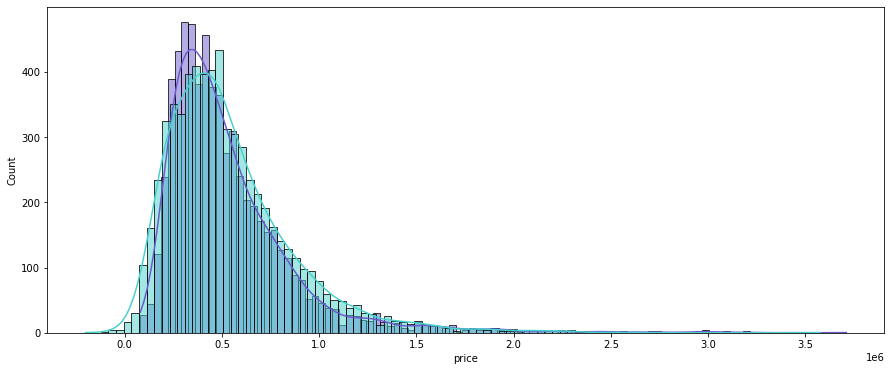

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(y2_test, label ='Groud Truth',color='slateblue',kde=True)
sns.histplot(y_comp_2_predict, label = 'predict', color='mediumturquoise',kde=True)

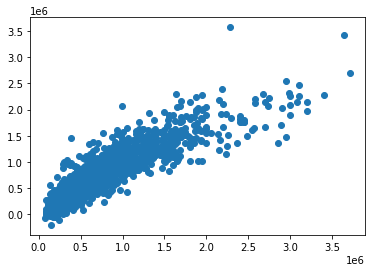

In [73]:
plt.scatter(y2_test, y_comp_2_predict)

In [62]:
y_comp_2_predict

array([708110.33816181, 484089.15157328, 721229.4597115 , ...,
       681880.89850567, 526333.89172542,  65566.08074298])